# Homework-1

### Lasso Optimization

In [126]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a directory for storing plots
plot_dir = 'images'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
# Generate random A and y
np.random.seed(1)
A = np.random.randn(20, 10)
y = np.random.randn(20)

# Generate lambda values
lambda_values = np.logspace(-2, 3, num=100)

In [127]:
def soft_threshold(x, lambda_):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

def coordinate_minimization_lasso(A, y, lambda_, max_iter=1000, tol=1e-6):
    x = np.zeros(A.shape[1])
    for _ in range(max_iter):
        x_old = x.copy()
        for j in range(A.shape[1]):
            r = y - np.dot(A, x) + A[:, j] * x[j]
            x[j] = soft_threshold(np.dot(A[:, j], r), lambda_) / (np.dot(A[:, j], A[:, j]))
        if np.linalg.norm(x - x_old) < tol:
            break
    return x

In [128]:
x_values = []
x_sklearn_values = []

for lambda_ in lambda_values:
    # My implementation
    x = coordinate_minimization_lasso(A, y, lambda_)
    x_values.append(x)
    
    # sklearn implementation
    lasso = Lasso(alpha=lambda_, fit_intercept=False, max_iter=10000)
    lasso.fit(A, y)
    x_sklearn_values.append(lasso.coef_)

x_values = np.array(x_values)
x_sklearn_values = np.array(x_sklearn_values)

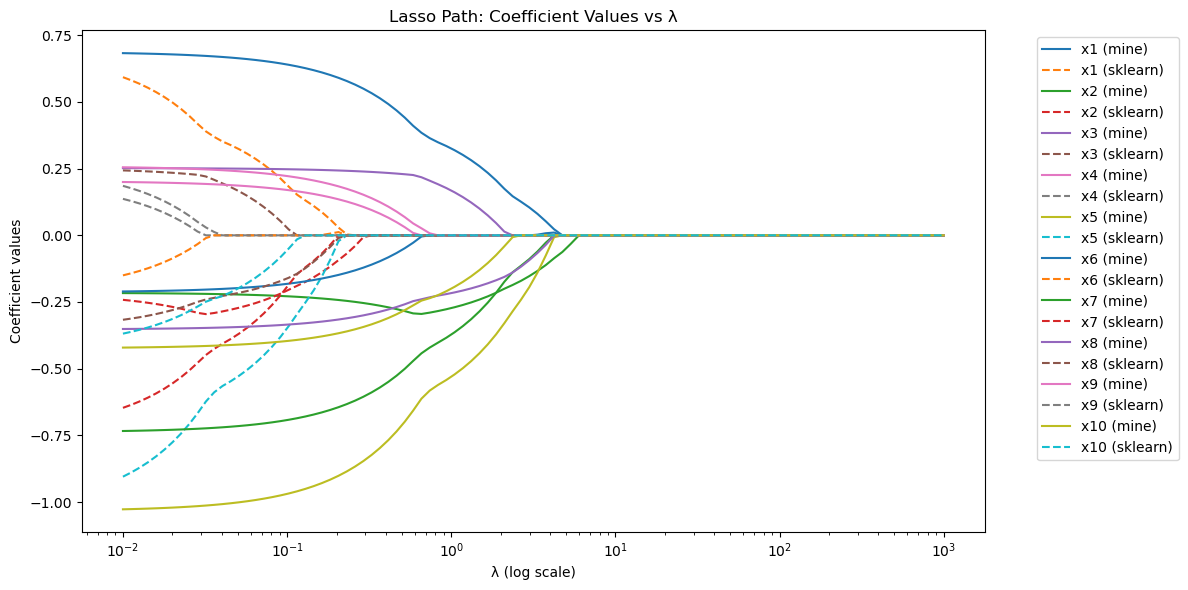

In [129]:
plt.figure(figsize=(12, 6))
for i in range(A.shape[1]):
    plt.semilogx(lambda_values, x_values[:, i], label=f'x{i+1} (mine)')
    plt.semilogx(lambda_values, x_sklearn_values[:, i], '--', label=f'x{i+1} (sklearn)')

plt.xlabel('λ (log scale)')
plt.ylabel('Coefficient values')
plt.title('Lasso Path: Coefficient Values vs λ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'lasso_path.png'))
plt.show()

### Least Squares Extension

In [130]:
from numpy import linalg as LA

# Define the size of matrices
n = 5

# Randomly generate A, X*, and C
A = np.random.rand(n, n)
X_star = np.random.rand(n, n)
C = np.random.rand(n, n)

# Calculate Y
Y = A @ X_star + X_star @ C

In [131]:
def vec(X):
    return X.flatten('F')

def solve_least_squares(A, C, Y):
    # Construct the matrix for the linear system
    M = np.kron(np.eye(n), A) + np.kron(C.T, np.eye(n))
    
    # Solve the linear system
    vec_X = LA.solve(M.T @ M, M.T @ vec(Y))
    
    # Reshape the solution back to a matrix
    X = vec_X.reshape((n, n), order='F')
    
    return X

# Obtain the optimal X
X_opt = solve_least_squares(A, C, Y)

In [132]:
# Compare vec(X_opt) with vec(X*)
vec_X_opt = vec(X_opt)
vec_X_star = vec(X_star)

print("Frobenius norm of the difference:")
print(LA.norm(vec_X_opt - vec_X_star))

print("\nFirst few elements of vec(X_opt):")
print(vec_X_opt[:5])

print("\nFirst few elements of vec(X*):")
print(vec_X_star[:5])

Frobenius norm of the difference:
4.761488224014982e-13

First few elements of vec(X_opt):
[0.54155938 0.52642593 0.74563719 0.69094214 0.20390623]

First few elements of vec(X*):
[0.54155938 0.52642593 0.74563719 0.69094214 0.20390623]


### Ridge Regression

In [133]:
# Generate random A and y
m, n = 100, 20
A = np.random.randn(m, n)
y = np.random.randn(m)

In [134]:
# Function to compute the norm
def compute_norm(A, y, lambda_):
    return np.linalg.norm(np.linalg.inv(A.T @ A + lambda_ * np.eye(n)) @ A.T @ y)

# Generate lambda values
lambda_values = np.logspace(-6, 6, 100)

# Compute norms for different lambda values
norms = [compute_norm(A, y, lambda_) for lambda_ in lambda_values]

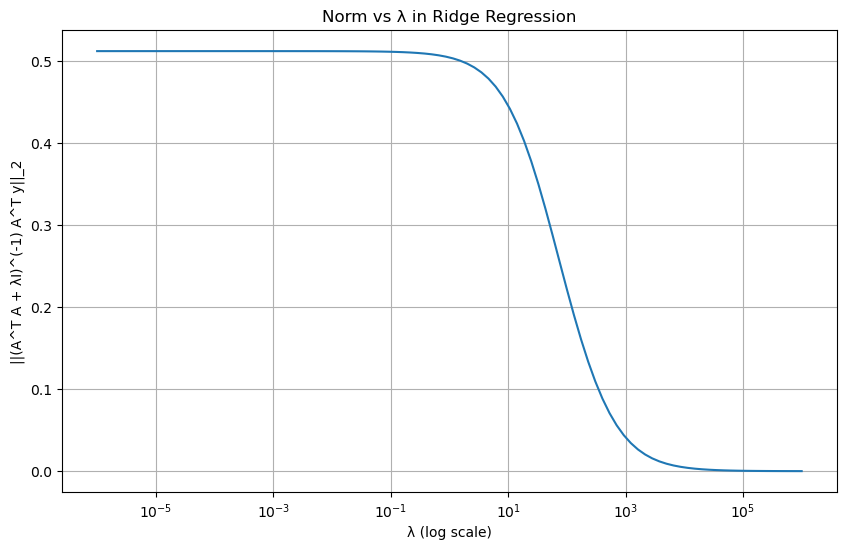

In [135]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, norms)
plt.xlabel('λ (log scale)')
plt.ylabel('||(A^T A + λI)^(-1) A^T y||_2')
plt.title('Norm vs λ in Ridge Regression')
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'ridge_regression.png'))
plt.show()

#### Mathematical Proof

Let $f(\lambda) = \|(A^T A + \lambda I)^{-1} A^T y\|_2$

To prove $f(\lambda)$ is monotone decreasing, we need to show that $f'(\lambda) \leq 0$ for all $\lambda \geq 0$.

1. Let $B(\lambda) = (A^T A + \lambda I)^{-1}$
   
2. Using the matrix derivative formula: $\frac{dB}{d\lambda} = -B^2$

3. $f(\lambda)^2 = y^T A B(\lambda)^2 A^T y$

4. Differentiating $f(\lambda)^2$ with respect to $\lambda$:
   $\frac{d(f(\lambda)^2)}{d\lambda} = y^T A (\frac{dB}{d\lambda}) B A^T y + y^T A B (\frac{dB}{d\lambda}) A^T y$
                                      $= -2 y^T A B^3 A^T y$

5. Using the chain rule:
   $2f(\lambda)f'(\lambda) = -2 y^T A B^3 A^T y$

6. Therefore:
   $f'(\lambda) = -\frac{y^T A B^3 A^T y}{y^T A B^2 A^T y}$

7. Both numerator and denominator are positive for $\lambda \geq 0$ (since $B$ is positive definite).

8. Thus, $f'(\lambda) \leq 0$ for all $\lambda \geq 0$.

This proves that $f(\lambda)$ is indeed a monotone decreasing function with respect to $\lambda$.

### Linear Regression and its Extension

In [136]:
# Load data
data = np.loadtxt('files/housing.data')

# Separate features and target
x = data[:, 0:13]
y = data[:, 13]

# Get number of samples and features
n, d = x.shape

# Shuffle data
perm = np.random.permutation(n)
x = x[perm, :]
y = y[perm]

# Split data into training and test sets
Ntrain = 300
Xtrain = x[:Ntrain, :]
ytrain = y[:Ntrain]
Xtest = x[Ntrain:, :]
ytest = y[Ntrain:]

In [137]:
# Function to fit linear regression and compute MSE
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    return train_mse, test_mse

In [138]:
# Extract subsets of training data
n_values = [25, 50, 75, 100, 150, 200, 300]
train_mse_list = []
test_mse_list = []

for n in n_values:
    X_subset = Xtrain[:n]
    y_subset = ytrain[:n]
    train_mse, test_mse = fit_and_evaluate(X_subset, y_subset, Xtest, ytest)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

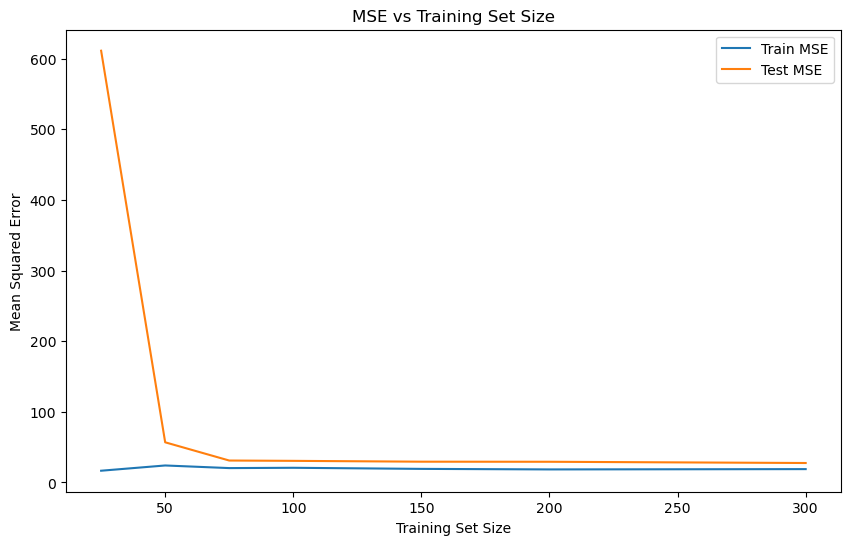

In [139]:
# Plot MSE versus training set size
plt.figure(figsize=(10, 6))
plt.plot(n_values, train_mse_list, label='Train MSE')
plt.plot(n_values, test_mse_list, label='Test MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Training Set Size')
plt.legend()
plt.savefig(os.path.join(plot_dir, 'linear_regression.png'))
plt.show()

#### Explanation
1. The test error decreases as the training set size increases because the model has more data to learn from, leading to better generalization.
2. The training error increases as the training set size increases because it becomes harder for the model to fit all the data points perfectly as the dataset grows.
3. The curves eventually meet because as we use more training data, the model's performance on both training and test sets converges to its true capability.

In [140]:
# Function to expand features to higher order terms
def degexpand(X, deg):
    X_expanded = X.copy()
    for d in range(2, deg + 1):
        X_expanded = np.column_stack((X_expanded, X ** d))
    return X_expanded

# Function to fit and evaluate models with different degrees
def fit_and_evaluate_poly(X_train, y_train, X_test, y_test, degree):
    X_train_poly = degexpand(X_train, degree)
    X_test_poly = degexpand(X_test, degree)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse

In [141]:
# Fit models with degrees 1 to 6
degrees = range(1, 7)
train_mse_poly = []
test_mse_poly = []

for degree in degrees:
    train_mse, test_mse = fit_and_evaluate_poly(Xtrain, ytrain, Xtest, ytest, degree)
    train_mse_poly.append(train_mse)
    test_mse_poly.append(test_mse)

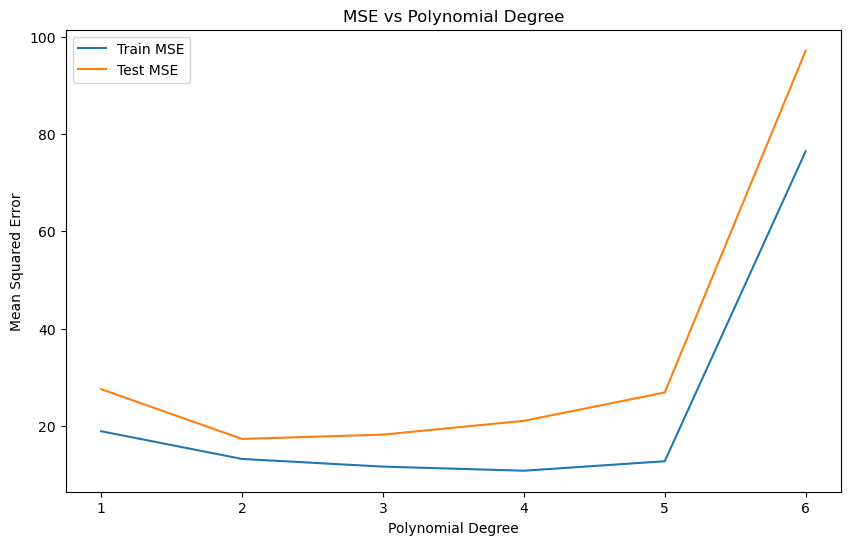

In [142]:
# Plot MSE vs degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse_poly, label='Train MSE')
plt.plot(degrees, test_mse_poly, label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.savefig(os.path.join(plot_dir, 'MSEvsPoly.png'))
plt.show()

#### Explanation
1. The training error decreases with increasing degree because the model becomes more flexible and can fit the training data better.
2. The test error initially decreases as the model becomes more expressive, but then increases due to overfitting.
3. The optimal degree is where the test error is lowest, balancing between underfitting and overfitting.

In [143]:
# Function to fit and evaluate ridge regression models
def fit_and_evaluate_ridge(X_train, y_train, X_test, y_test, alpha):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse

In [144]:
# Generate lambda values
lambdas = np.logspace(-10, 10, 21)

# Fit ridge regression models for different lambda values
train_mse_ridge = []
test_mse_ridge = []

for alpha in lambdas:
    train_mse, test_mse = fit_and_evaluate_ridge(Xtrain, ytrain, Xtest, ytest, alpha)
    train_mse_ridge.append(train_mse)
    test_mse_ridge.append(test_mse)

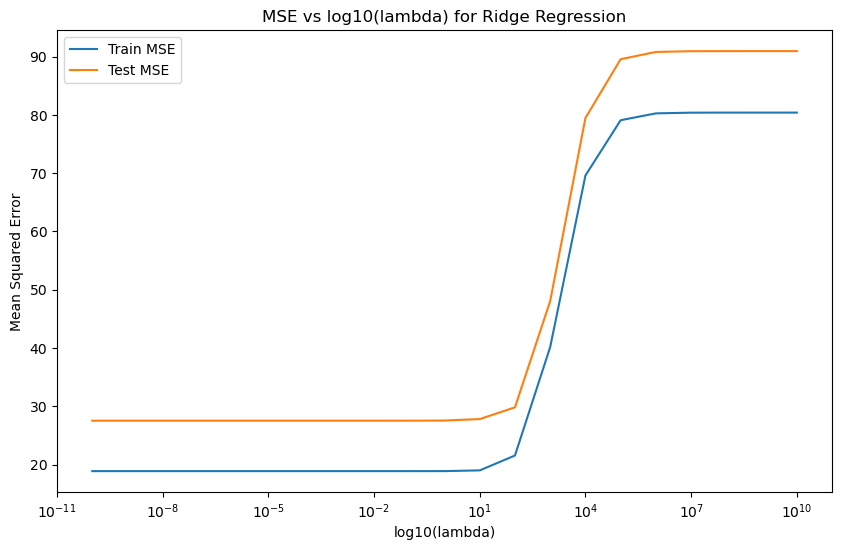

In [145]:
# Plot MSE vs log10(lambda)
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, train_mse_ridge, label='Train MSE')
plt.semilogx(lambdas, test_mse_ridge, label='Test MSE')
plt.xlabel('log10(lambda)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs log10(lambda) for Ridge Regression')
plt.legend()
plt.savefig(os.path.join(plot_dir, 'MSEvsLog.png'))
plt.show()

#### Explanation
1. For very small lambda values (high regularization), both training and test errors are high due to underfitting.
2. As lambda increases, both errors decrease as the model becomes more flexible.
3. The test error reaches a minimum at an optimal lambda value, balancing between underfitting and overfitting.
4. For very large lambda values (low regularization), the model overfits, causing the test error to increase while the training error continues to decrease.